PROBLEM STATEMENT

I am working as a data scientist in a real estate company and I have been provided with a data set to predict the price of the property. In these years its hard for new person in the city like mumbai to find an accommodation. As a slolution this projects objective is to build a machine learning pipeline to predict the accuracy of real estate market to make the proper match for the customer according to their needs. The dataset consists of informations like area, location, number of bedrooms, and presenece of essential amenities like bed, dining table, sofa and wardrobe. I am using linear regression, K-Nearest Neigbhors (KNN) and decision tree in this for this dataset. From these the best performed model was linear regression which gave 0.5262 accuracy.

The data set was taken from the kaggle the link to the page is attached.
https://www.kaggle.com/datasets/ruchi798/housing-prices-in-metropolitan-areas-of-india
The zip file from the webpage has a dataset named "Mumbai.csv", it is the dataset used for this prediction pipeline

In [43]:
import pandas as pd
import numpy as np   #to import Numpy library for using multidiamentional arrays, mathematic functions ,etc. 
import matplotlib.pyplot as plt #to import mathplotlib.pyplot library for using bar plots, histograms, etc.
import seaborn as sns #to import seaborn library for using data visualization, creating statistical Plots.
from sklearn.model_selection import train_test_split #to split the data to train and test data
from sklearn.linear_model import LinearRegression #this loads the linear regression function from sklearn
from sklearn.tree import DecisionTreeRegressor #this loads the decision tree regressor module from sklearn
from sklearn.neighbors import KNeighborsRegressor #this loads the knn module from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #imorts mse,mae and r2 functions from sklearn
from sklearn.preprocessing import StandardScaler #this imports the sklearn module for mean and scaling 

DATA COLLECTION AND PREPROCESSING

First I defined the dataset as df and I inserted the file. After opening the dta set I am removing some rows from the dataset to rduce the complexicity of the dataset.

In [44]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Mumbai.csv')
data_subset = df.head(500)
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7714,14500000,1180,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
7715,14500000,530,Naigaon East,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
7716,4100000,700,Shirgaon,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
7717,2750000,995,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


Making a copy of the dataframe df , copy name "df1".

In [47]:
df1 = data_subset.copy()
df1

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,62500000,2665,Goregaon West,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
496,26500000,1305,Malad West,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,1
497,13000000,995,Malad West,2,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,1
498,10600000,1014,Malad West,2,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [48]:
columns_to_remove = ['MaintenanceStaff', 'School', 'AC','CarParking', 'Hospital', 'WashingMachine', 'Gasconnection', 'Refrigerator', 'TV', 'Microwave', 'Wifi', "Children'splayarea", 'LiftAvailable', '24X7Security', 'PowerBackup', 'Resale', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom','SportsFacility', 'ATM', 'ClubHouse','StaffQuarter', 'Cafeteria', 'MultipurposeRoom',  'VaastuCompliant', 'GolfCourse']
df1 = df1.drop(columns=columns_to_remove)
df1

,Price,Area,Location,No. of Bedrooms,BED,DiningTable,Sofa,Wardrobe
0,4850000,720,Kharghar,1,0,0,0,0
1,4500000,600,Kharghar,1,0,0,0,0
2,6700000,650,Kharghar,1,0,0,0,0
3,4500000,650,Kharghar,1,1,0,0,1
4,5000000,665,Kharghar,1,0,0,0,0
...,...,...,...,...,...,...,...,...
495,62500000,2665,Goregaon West,3,0,0,0,0
496,26500000,1305,Malad West,3,0,0,0,0
497,13000000,995,Malad West,2,0,1,0,0
498,10600000,1014,Malad West,2,0,0,0,0


This step is done for checking whether there is any missing value columns. The result shows that there is no null column in the dtata set since the output show all zeros.

In [49]:
missing_values = df1.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Price              0
Area               0
Location           0
No. of Bedrooms    0
BED                0
DiningTable        0
Sofa               0
Wardrobe           0
dtype: int64


The dataset consist of a lot of un important things from a perspective of a new person in the city. So removing the unnessesary columns from the datase and keeping the relevent things like price, area, location, no.of bedrooms and few other amenities like bed, diningtable, sofa and wardrobe to get much more sorted on the data.

For the upcoming codes the Location column is not required. So making a copy of the datadrame drop 'df1.drop' and removes the location column and saves the copy as df2.

In [50]:
df2 = df1.copy()
columns_to_remove = ['Location']
df2 = df1.drop(columns=columns_to_remove)
df2

,Price,Area,No. of Bedrooms,BED,DiningTable,Sofa,Wardrobe
0,4850000,720,1,0,0,0,0
1,4500000,600,1,0,0,0,0
2,6700000,650,1,0,0,0,0
3,4500000,650,1,1,0,0,1
4,5000000,665,1,0,0,0,0
...,...,...,...,...,...,...,...
495,62500000,2665,3,0,0,0,0
496,26500000,1305,3,0,0,0,0
497,13000000,995,2,0,1,0,0
498,10600000,1014,2,0,0,0,0


DATA EXPLORATION 

This dataset had a lot of data regarding a property the from the basic requirments to a large number of facilities. As there is a lots of facilities provided in the dataset which are not basic requirement and also these makes the data processing and prediction complicated and processing requires the maximum efficency of this model to run the whole dataset. By excluding some colunms it make much more easy to process bt there will be a drop in accuracy of the model. From the analysis the data is not very accurate this also might affect the prediction accuracy.

The next step prints the describtion of the dataset.

In [51]:
print(df1.describe())

              Price         Area  No. of Bedrooms         BED  DiningTable  \
count  5.000000e+02   500.000000       500.000000  500.000000   500.000000   
mean   1.290313e+07  1095.106000         1.962000    0.234000     0.024000   
std    1.220917e+07   534.015145         0.859088    0.423796     0.153202   
min    2.000000e+06   300.000000         1.000000    0.000000     0.000000   
25%    5.500000e+06   650.000000         1.000000    0.000000     0.000000   
50%    9.400000e+06  1050.000000         2.000000    0.000000     0.000000   
75%    1.550000e+07  1412.000000         3.000000    0.000000     0.000000   
max    1.060000e+08  5245.000000         5.000000    1.000000     1.000000   

             Sofa    Wardrobe  
count  500.000000  500.000000  
mean     0.024000    0.050000  
std      0.153202    0.218163  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    0.000000  
max      1.000000    1.000000  


In the next step a mathplotlib library is initialized as a new figure for plotting, the size is specified so for width 7 is given and for height 4. For creating histogram plot sns library is used. specifies the data to be plotted which is price ('df[price ]'), hernel density estimation ('kde=True') is set true to display the curve on top of the histogram to diplay the distribution and also red colour is given by using color='red'. plt.title('Property Price') is used to set title Property Price. To show x axis label "plt.xlabel('Price')" is used and price is the label .To add y axis label "plt.ylabel('Frequency')" is used. plt.show() is for displaying the chart with the given features.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


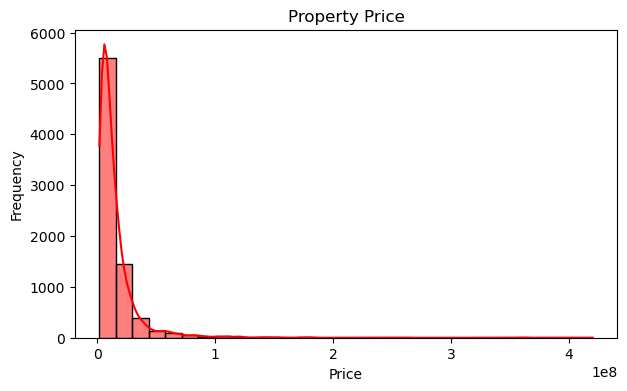

In [56]:
df1
plt.figure(figsize=(7,4))
sns.histplot(df['Price'], kde=True , bins=30, color='red')
plt.title('Property Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

"df2" is used to consider the copy dataframe "df1" as the dataframe required in this step.
The next step is to find the corelation heatmap from this for that the figsize is given as 20 width and 10 height. sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f") this line is ued to display the correlation heatmap 'sns.heatmap' is the command for the heatmap , 'df.corr()' is used to calculate the correlation matrix of the dataframe which is 'df', 'annot=True' adds the numerical value or annotations to each cell of the heatmap to display the correlation coefficients,  "cmap='coolwarm'" is used for colour map and 'coolwarm' gives the red and blue colour, 'fmt=".2f"' is used to formats display two decimal places for better readability. 'plt.title()' is used to give title to the heatmap. 'plt.show()' is used to show the correlation heatmap.

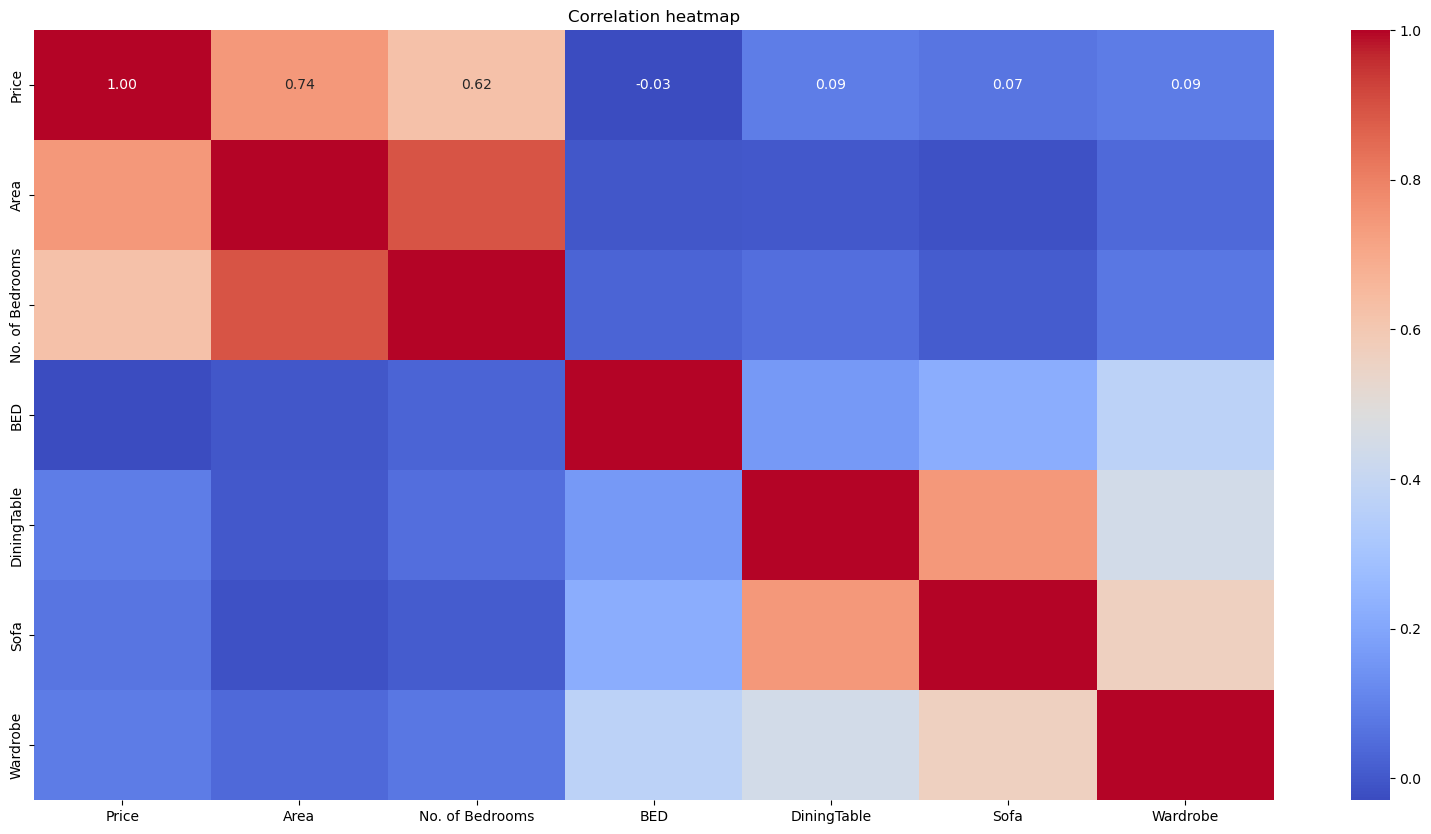

In [57]:
df = df2
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap')
plt.show()

The next step is to represent the relation between numerical features and price. For considering the numerical features I am using "numerical_features" and adding the names of the columns which consist of the numerical values. I initiated a for loop which iterates over each numerical feature. Then created a new figure for plotting with a specified size of width 8 and height 5. 'sns.scatterplot(data=df, x=feature, y='Price', color='green')' this adds the seaborn library for representing scatter plot and it displays the relationship between the current numerical feature on the x-axis and the target variable price on the y-axis. Plot title is given by using "plt.title". "{feature}" is used for giving the different column names. Then added label for both x-axis and yaxis using "plt.xlabel" and "plt.ylabel". "plt.show()" for displaying the scatter plot.

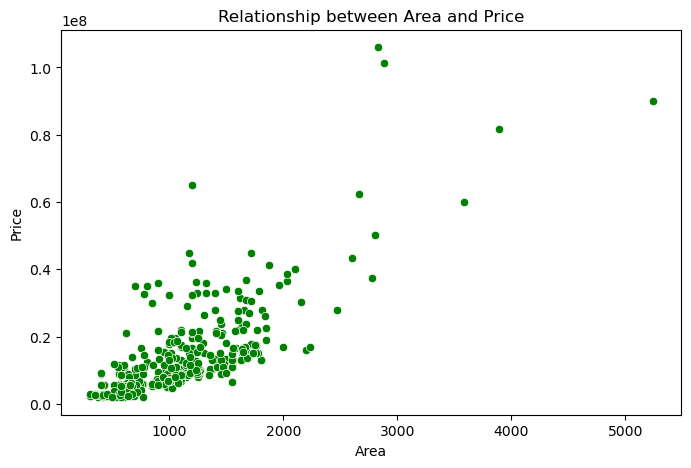

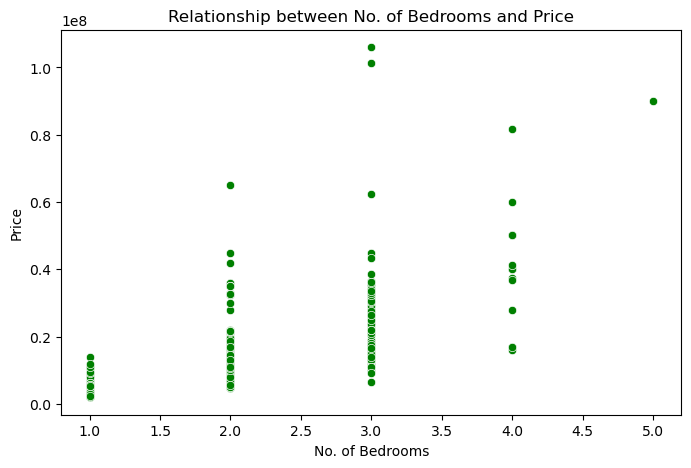

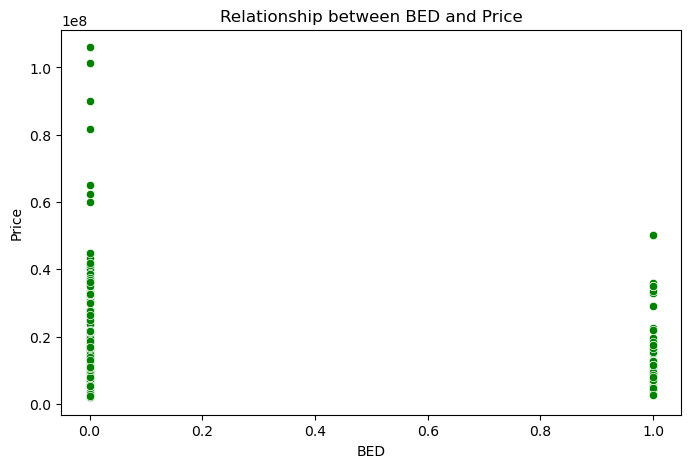

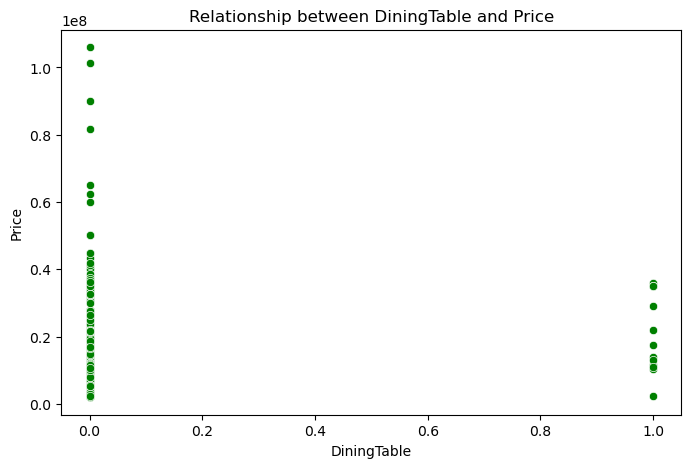

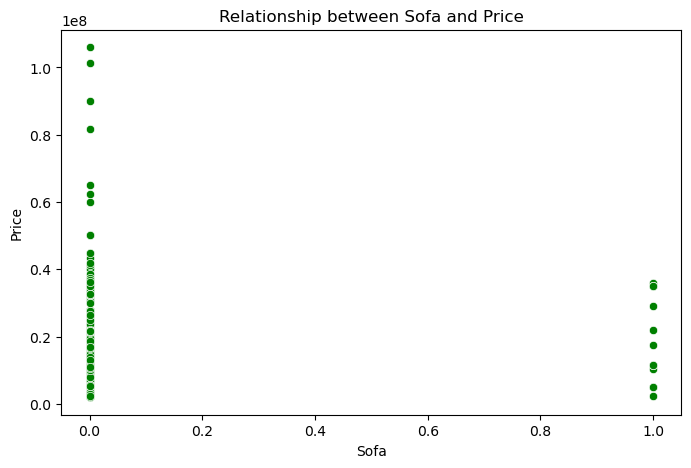

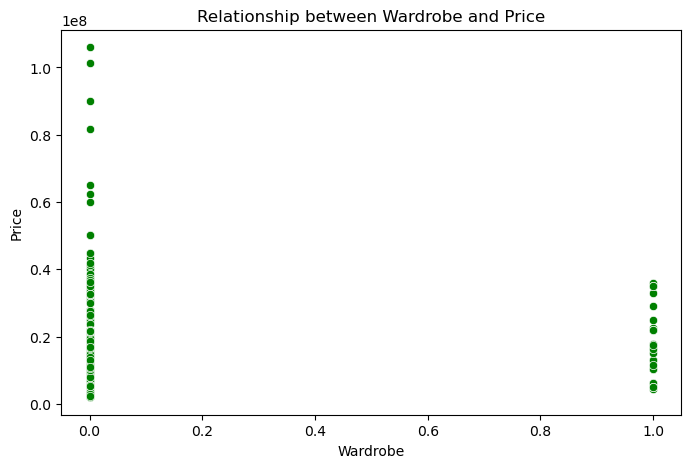

In [58]:
numerical_features = ['Area', 'No. of Bedrooms', 'BED', 'DiningTable', 'Sofa', 'Wardrobe']
for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x=feature, y='Price', color='green')
    plt.title(f'Relationship between {feature} and Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

"df = df1" is used for assinging df1 as the dataframe for this set of codes. This is done for bringing back the "location" column which was removed in the "df2". 
"plt.figure(figsize=(100, 70))" this matplotlib library is used for calculating the size of the plot chart size given is width 100 and the height 70. 
"sns.barplot(data=df1, x='Location', y='Price')" 'sns' is to use seaborn library, the 'boxplot' is for visualizing the distribution of "price" for each "location". For x-axis loaction is alligned and in y-axis price.  
"plt.xticks(rotation=90)" This is used for rotating the x-axis variable text allign straightly (90 degree angle). 
Then title is given using "plt.title" statement. 
Then label for x-axis and y-axis is given using "plt.xlabel" and "plt.ylabel".
"plt.show()" is to display the plot chart.

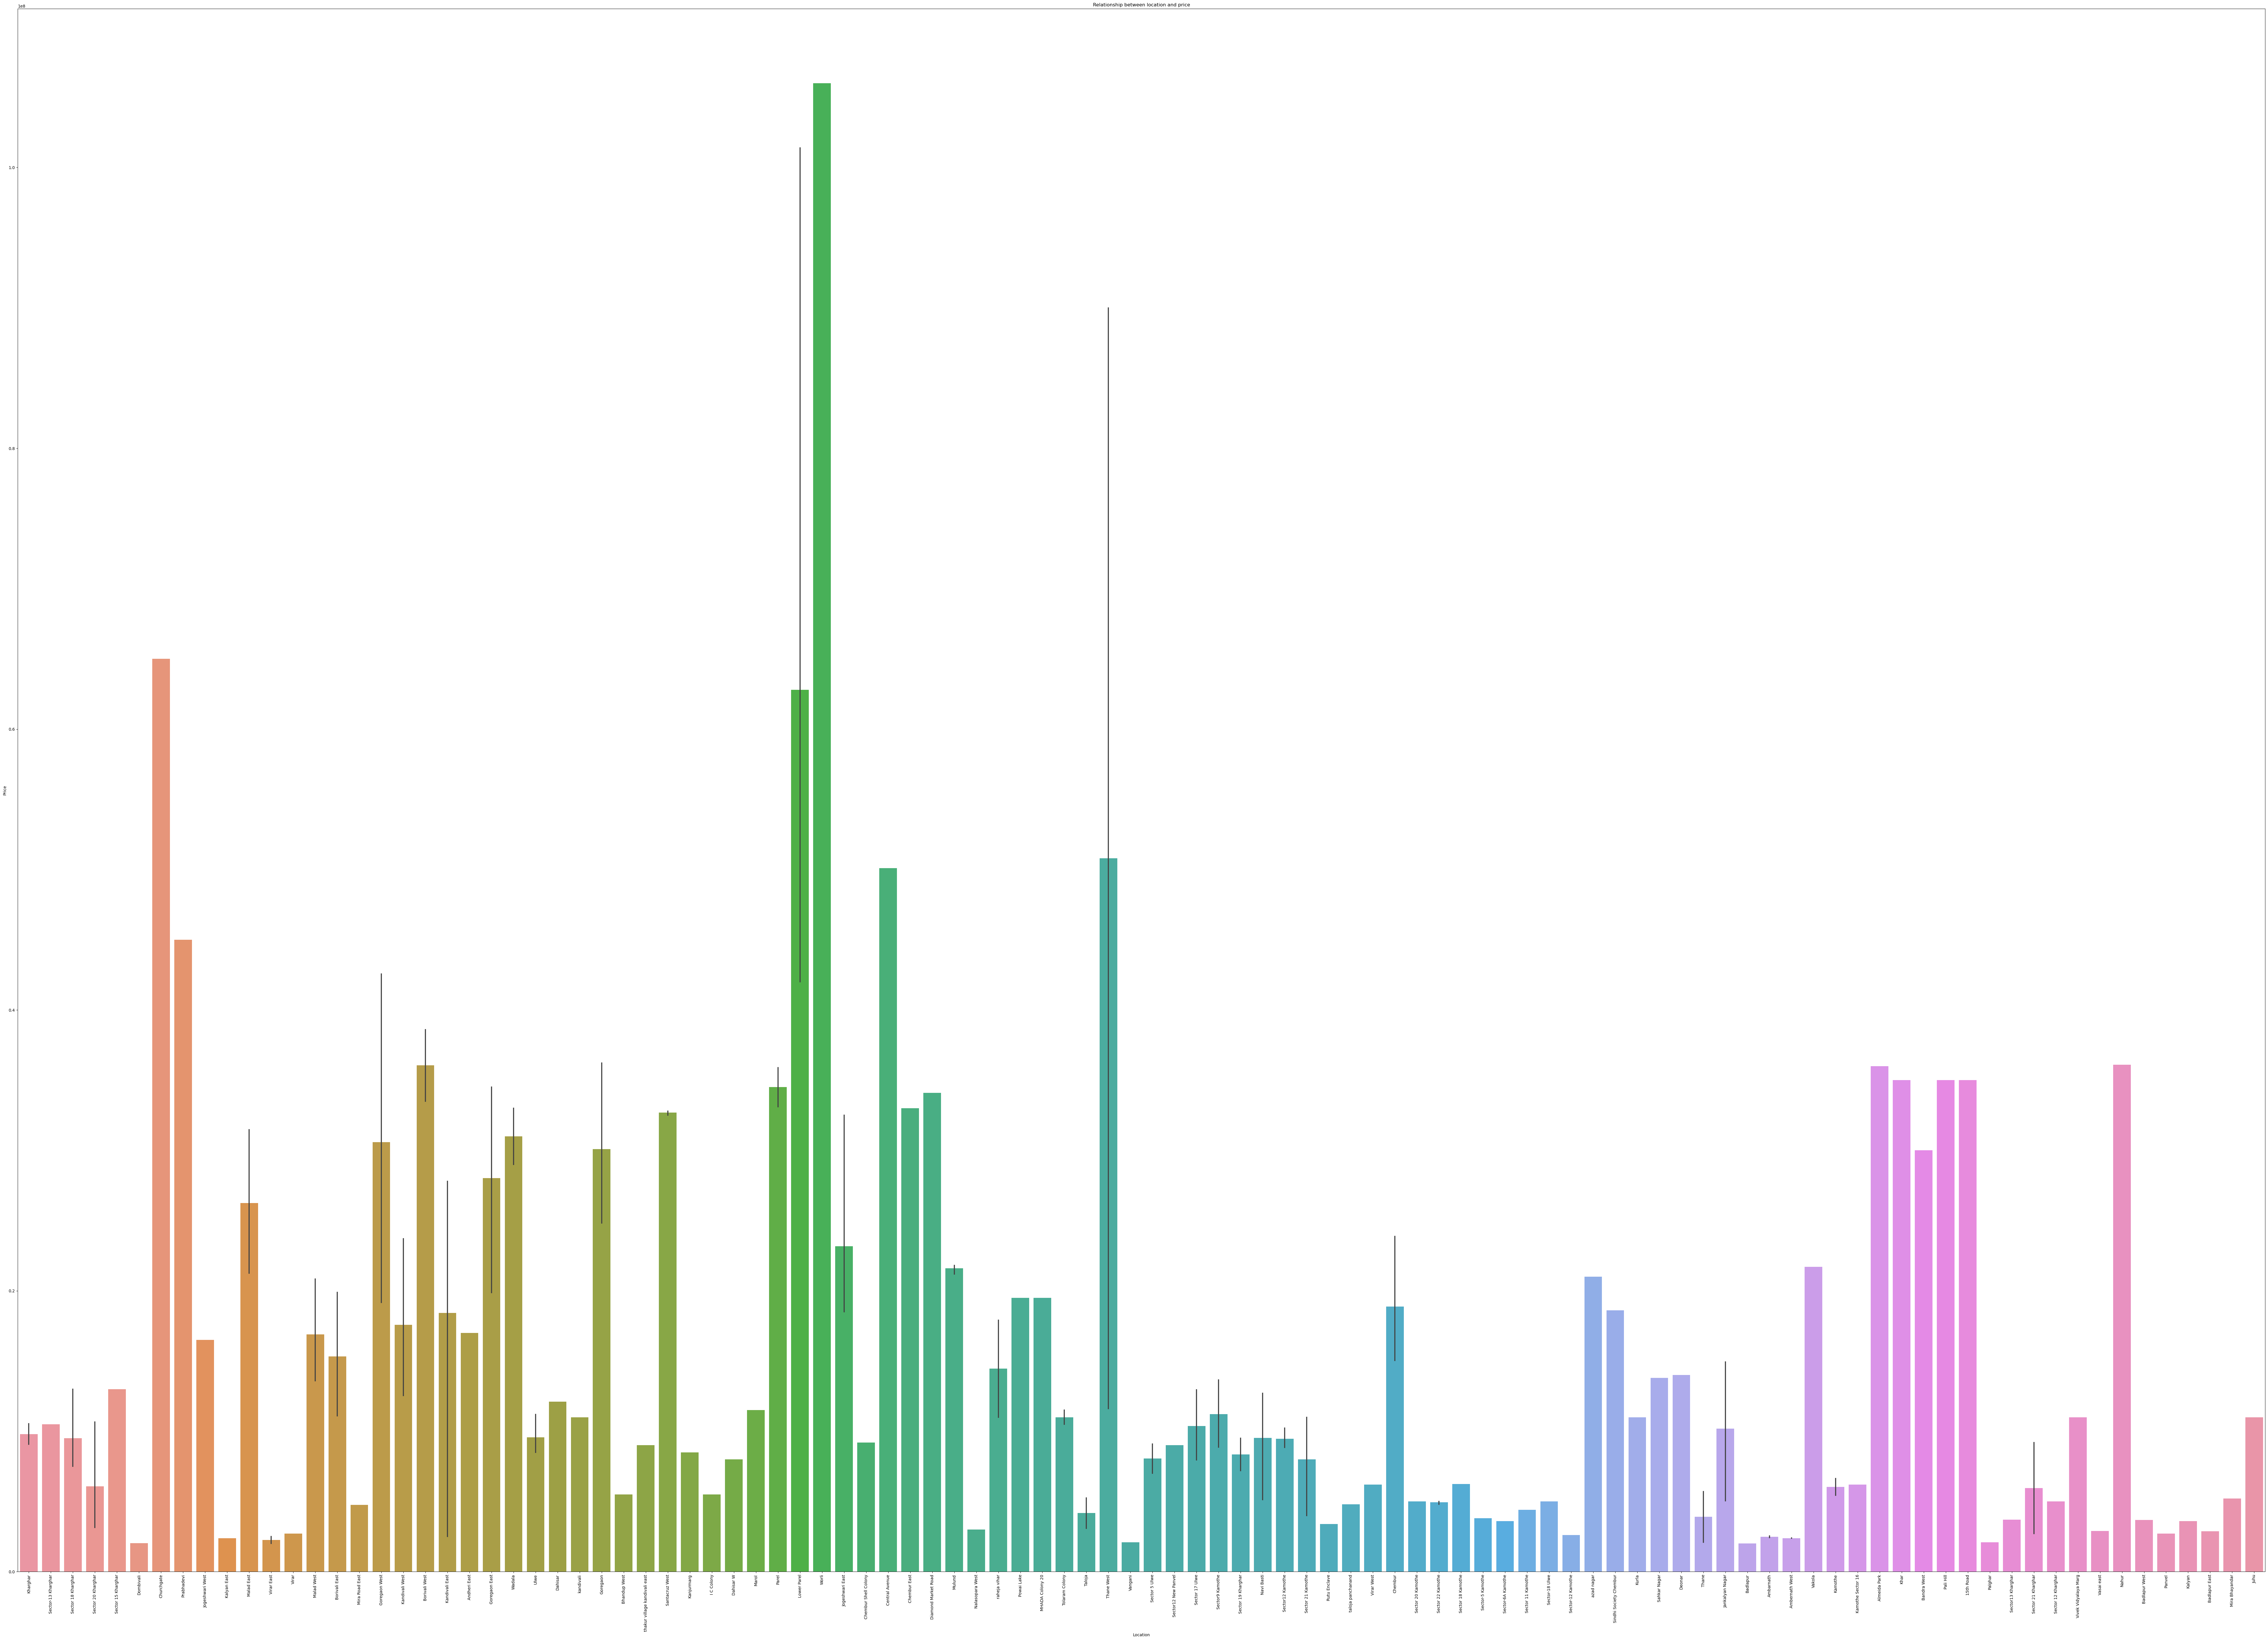

In [59]:
df = df1
plt.figure(figsize=(100, 70))
sns.barplot(data=df1, x='Location', y='Price')
plt.xticks(rotation=90)
plt.title('Relationship between location and price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

FEATURE ENGINEERING

"df = df1" is used for defining the dataframe "df1" as the dataframe to use in this part of the pipeline.
In the feature engineering I am extracting relevent features like bed, dining tables, sofa and wardrobe to calculate the number of aminities in each property. Then combining them into a single column to provide an overview of the overall aminities in the property based on the aminities they are providing by ceating a new dataframe "df['Total_Amenities']". 
And also adding another dataframe "df['Price_per_Bedroom']" to identify the ratio of price per the bedrooms provided. Adding these new columns helps in increases the value of the dtatset for predicting the price of the property. 
"df['Area_log'] " is added to apply the natural logarithm transformation for the column area "np.log(df['Area'])". This logaritham transformation helps in compressing the large range and to handle skewed distribution. 
Another feature is added which is to square the area "df['Area_squared']". This is to aquire the nonlinear relationship between area and price. 
"df['Location_encoded'] = pd.factorize(df['Location'])[0]" this line is to change the location names which are in the integer to a numerical value for futher ther will be issues when comparison between integer and numericals is not going to be possible so this helps to solve the issue.
New columns will be added in these names 'Total_Amenities', 'Price_per_Bedroom', 'Area_log', 'Area_squared' and 'Location_encoded'. By adding these the perfomance of the machine learning mpdel can be improved.   

In [29]:
df = df1
df['Total_Amenities'] = df['BED'] + df['DiningTable'] + df['Wardrobe'] + df['Sofa']
df['Price_per_Bedroom'] = df['Price'] / df['No. of Bedrooms']
df['Area_log'] = np.log(df['Area']) 
df['Area_squared'] = df['Area'] ** 2
df['Location_encoded'] = pd.factorize(df['Location'])[0]
print(df.head())

     Price  Area  Location  No. of Bedrooms  BED  DiningTable  Sofa  Wardrobe  \
0  4850000   720  Kharghar                1    0            0     0         0   
1  4500000   600  Kharghar                1    0            0     0         0   
2  6700000   650  Kharghar                1    0            0     0         0   
3  4500000   650  Kharghar                1    1            0     0         1   
4  5000000   665  Kharghar                1    0            0     0         0   

   Total_Amenities  Price_per_Bedroom  Area_log  Area_squared  \
0                0          4850000.0  6.579251        518400   
1                0          4500000.0  6.396930        360000   
2                0          6700000.0  6.476972        422500   
3                2          4500000.0  6.476972        422500   
4                0          5000000.0  6.499787        442225   

   Location_encoded  
0                 0  
1                 0  
2                 0  
3                 0  
4           

MODEL BUILDING 

In this stage, the model is trained in different algorithms for regression analysis. Linear regression, decision tree and k-nearest neighbor these are the few algorithmsn that I am using in this pipeline to predict the price of the property. 


LINEAR REGRESSION

In this I am giving the independet variables like "Area,No. of Bedrooms, BED, DiningTable, Sofa and Wardrobe" as "x" and then giving price which is the target variable as "y". Then by using the sklearns module for splitting our data into test and train sets. Then by using the "LinearRegression()" module of the sklearn to train my model for the prediction. By using "y_pred = linear_reg.predict(x_test)" I prepared the model to predict the target variable "price" for the features "x_test". Mean squared error , mean absolute error and r-squared scores are evaluated by using "mean_squared_error", "mean_asolute error" and "r2_score" which are modules of sklearn. These kits from sklearn are loaded in the begining of the model training itself. As the final step of the linear regression analysis the results from the analysis is printed using "print()". This gives the mean squared error , mean absolute error and the regression score which can be sid as the accuracy.

In [61]:
x = df[['Area','No. of Bedrooms', 'BED', 'DiningTable', 'Sofa', 'Wardrobe' ]]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=3)
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred = linear_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("Mean absolute Error: ", mae)
print("Accuracy : ", r2)

Mean squared error:  81268008145773.95
Mean absolute Error:  5226060.465910603
Accuracy :  0.5262909181439037


DECISION TREE

This is the second model training which is decision tree. For running this algorithm I have given the x variables as Area,No. of Bedrooms, BED, DiningTable, Sofa and Wardrobe. And as y variable I have given Price which is the target variable. Then using "train_test_split" I am spitting the data into test and train sets and giving text size 0.2. The "random_state" is used for splitting process, it will always produce the same train-test split. After aligning the variables, decision tree algorithm is initiated by using "DecisionTreeRegressor" module from the sklearn and a random state is given to ensure reproducibility of result. The dcision tree is then trained using "fit" method for  "x_train, y_train". Then i used "y_pred" for predicting the price by testing the "x_test" feature using "predict" method. "mean_squared_error",  "mean_absolute_error" and "r2_score" are imported from sklearn to compute and evaluate the model's prediction accuracy. "print()" is used to print the output from mse, mae and r2 score. 

In [62]:
x = df[['Area','No. of Bedrooms', 'BED', 'DiningTable', 'Sofa', 'Wardrobe' ]]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=3)
decision_tree = DecisionTreeRegressor(random_state=3)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("Accuracy : ", r2)

Mean squared error:  88534210630232.33
Mean absolute error:  4051350.284126984
Accuracy :  0.4839364149878884


K-NEAREST NEIGHBORS (KNN)

Third model training, for running this algorithm I have given the x variables as Area,No. of Bedrooms, BED, DiningTable, Sofa and Wardrobe. And as y variable I have given Price which is the target variable. Then using "train_test_split" I am spitting the data into test and train sets and giving text size 0.2. The "random_state" is used for splitting process, it will always produce the same train-test split. Model initialization and training is done for "x_test" using predict method. Using the test data "x_train, y_train" I trainned the model for knn using the fit method. The model predicts the price of the property for the test data "x_test" using the "predict" method. "mean_squared_error", "mean_absolute_error" and "r2_score" are imported from sklearn to compute and evaluate the model's prediction accuracy. "print()" is used to print the output from mse, mae and r2 score.

In [63]:
x = df[['Area','No. of Bedrooms', 'BED', 'DiningTable', 'Sofa', 'Wardrobe' ]]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=3)
knn_regressor = KNeighborsRegressor(n_neighbors=25)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("Accuracy : ", r2)

Mean squared error:  98172998972813.4
Mean absolute error:  4988272.012399999
Accuracy :  0.42775217127197107


MODEL EVALUATION

I added the "model" dictionary which can identify different machine learning models as key and corresponding models. Then I gave the three models i trained "Linear Regression","Decision Tree" and "KNN". Then i initiated an empty dictionary "result" for stroing the result. For evaluating the model, first I opened a "for" loop to store the calculated mean squared error, mean absolute error and accuracy. The result values are stored in the "results". Then another for loop is opend to print the model name, mean squared error , mean absolute error and accuracy. Later the best model is to be recognised so for that i have assigned "best_model" for giving the name of the best model. By using "max" function the highest accuracy of the model is recognised from considering "R2 score" from the result dictionary. Finally "print()" is used to print the best performing model for the price prediction of the property.

In [64]:
def evaluate_model(model,x_test,y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2
models = {"Linear Regression": linear_reg, "Decision Tree regression": decision_tree, "K-Nearest Neighbors (KNN)": knn_regressor}
results = {}
for name , model in models.items():
    mse, mae, r2 = evaluate_model(model, x_test, y_test)
    results[name] = {"Mean squared error": mse, "Mean absolute error": mae, "Accuracy": r2}
for name,  metrics in results.items():
    print(f"model: {name}")
    print(f"Mean squared error: {metrics['Mean squared error']} ")
    print(f"Mean absolute error: {metrics['Mean absolute error']} ")
    print(f"Accuracy: {metrics['Accuracy']} ")
    print()
best_model = max(results, key=lambda x: results[x]["Accuracy"])
print(f"The best performing model for the price prediction of the property is: {best_model}")

model: Linear Regression
Mean squared error: 81268008145773.95 
Mean absolute error: 5226060.465910603 
Accuracy: 0.5262909181439037 

model: Decision Tree regression
Mean squared error: 88534210630232.33 
Mean absolute error: 4051350.284126984 
Accuracy: 0.4839364149878884 

model: K-Nearest Neighbors (KNN)
Mean squared error: 98172998972813.4 
Mean absolute error: 4988272.012399999 
Accuracy: 0.42775217127197107 

The best performing model for the price prediction of the property is: Linear Regression


CONCLUSION

The model I have build here is build to predicting the price of the property using the data in this dataset. There are multiple strengths and limitations to my model. The major strength is that it is accurate when it comes to the prediction of the property using the no.of rooms , area and aminities etc, it is also efficent to compare the price with the location but there is still limitations for it. However the model is a great option for looking for property in Mumbai using these data. 
There are limitations to my model too, I was not able to make a very precise prediction model. But the model can be 52.6% accurate while the prediction. The major limitation of my model is because there are so many factors in the dataset which alters the price of the property. So many unimportant things like swimming pool which is not an essential for a person moving in newly. And the location of the place also have a major role in the price because if the property is located in a hotspot the price will be high and I was not able to predict it precicely. The model is very simple and not complicated. This makes the model much more easily understandable. 